In [66]:
import pandas as pd
df = pd.read_csv('Pre_Outlier_removal.csv')
df.head()
print(df.shape)

(7195239, 21)


In [67]:
no_outliers = df['Price (Thousands)'].quantile(0.95)
no_outliers_df = df[df['Price (Thousands)'] < no_outliers]
no_outliers_df.head()

,Transfer Date,Postcode,Town/City,District,County,Price (Thousands),Freehold Tenure,Leasehold Tenure,Old Build,New Build,...,Flat,Other Property Type,Semi-detached,Terraced,Year,Month,Quarter,Day of the Week,Postcode Area,Postcode District
0,2018-09-24,M6 8GQ,SALFORD,SALFORD,GREATER MANCHESTER,253.500,1,0,1,0,...,0,0,0,0,2018,9,3,0,M,M6
1,2018-09-28,WA3 2UE,WARRINGTON,WIGAN,GREATER MANCHESTER,231.950,1,0,0,1,...,0,0,0,0,2018,9,3,4,WA,WA3
2,2018-08-29,OL6 6RJ,ASHTON-UNDER-LYNE,TAMESIDE,GREATER MANCHESTER,112.500,1,0,1,0,...,0,0,1,0,2018,8,3,2,OL,OL6
3,2018-06-15,M46 0TW,MANCHESTER,WIGAN,GREATER MANCHESTER,184.995,1,0,0,1,...,0,0,1,0,2018,6,2,4,M,M46
4,2018-09-28,M28 3XS,MANCHESTER,SALFORD,GREATER MANCHESTER,214.995,0,1,0,1,...,0,0,0,0,2018,9,3,4,M,M28


In [102]:
avg_day_price = no_outliers_df.groupby('Transfer Date')['Price (Thousands)'].mean().reset_index()
avg_day_price.columns = ['Transfer Date', 'Average Price (Thousands)']

avg_day_of_the_week_price = no_outliers_df.groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
avg_day_of_the_week_price.columns = ['Day of the Week', 'Average Price (Thousands)']

avg_quarter_price = no_outliers_df.groupby('Quarter')['Price (Thousands)'].mean().reset_index()
avg_quarter_price.columns = ['Quarter', 'Average Price (Thousands)']

avg_year_price = no_outliers_df.groupby('Year')['Price (Thousands)'].mean().reset_index()
avg_year_price.columns = ['Year', 'Average Price (Thousands)']

avg_month_price = no_outliers_df.groupby('Month')['Price (Thousands)'].mean().reset_index()
avg_month_price.columns = ['Month', 'Average Price (Thousands)']

avg_county_price = no_outliers_df.groupby('County')['Price (Thousands)'].mean().reset_index()
avg_county_price.columns = ['County', 'Average Price (Thousands)']

avg_year_price


,Year,Average Price (Thousands)
0,2018,257.606232
1,2019,260.059001
2,2020,274.525871
3,2021,292.097232
4,2022,300.594423
5,2023,296.431764
6,2024,300.520241
7,2025,305.545748


In [98]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

avg_month_price['Month'] = avg_month_price['Month'].map(month_names)
avg_month_price

,Month,Average Price (Thousands)
0,January,279.971732
1,February,279.103998
2,March,287.500990
3,April,275.433932
4,May,275.442877
5,June,296.265106
6,July,277.100322
7,August,283.675043
8,September,289.970497
9,October,282.445381


In [99]:
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
avg_day_of_the_week_price['Day of the Week'] = avg_day_of_the_week_price['Day of the Week'].map(day_names)
avg_day_of_the_week_price

,Day of the Week,Average Price (Thousands)
0,Monday,285.608119
1,Tuesday,292.139807
2,Wednesday,290.749327
3,Thursday,292.568140
4,Friday,275.574706
5,Saturday,260.425557
6,Sunday,260.019257


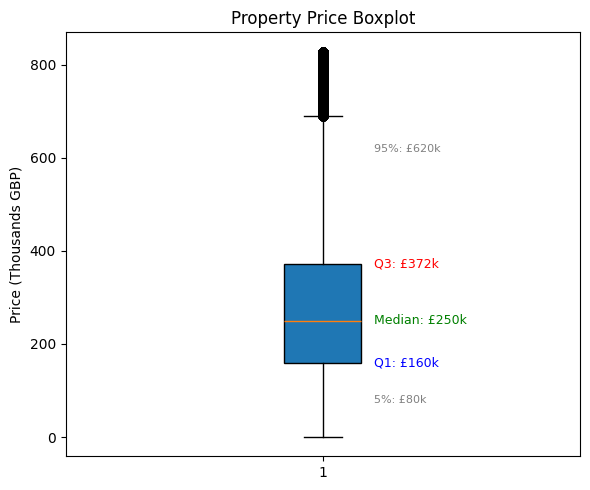

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get descriptive statistics
q1 = no_outliers_df['Price (Thousands)'].quantile(0.25)
median = no_outliers_df['Price (Thousands)'].median()
q3 = no_outliers_df['Price (Thousands)'].quantile(0.75)
whisker_low = no_outliers_df['Price (Thousands)'].quantile(0.05)  # Or use boxplot output
whisker_high = no_outliers_df['Price (Thousands)'].quantile(0.95)

plt.figure(figsize=(6, 5))
plt.boxplot(no_outliers_df['Price (Thousands)'], vert=True, patch_artist=True)
plt.title('Property Price Boxplot')
plt.ylabel('Price (Thousands GBP)')

# Add labels for Q1, Median, Q3
plt.text(1.1, q1, f'Q1: £{q1:,.0f}k', va='center', ha='left', fontsize=9, color='blue')
plt.text(1.1, median, f'Median: £{median:,.0f}k', va='center', ha='left', fontsize=9, color='green')
plt.text(1.1, q3, f'Q3: £{q3:,.0f}k', va='center', ha='left', fontsize=9, color='red')

# Optional: Add whiskers if desired
plt.text(1.1, whisker_low, f'5%: £{whisker_low:,.0f}k', va='center', ha='left', fontsize=8, color='gray')
plt.text(1.1, whisker_high, f'95%: £{whisker_high:,.0f}k', va='center', ha='left', fontsize=8, color='gray')

plt.tight_layout()
plt.show()


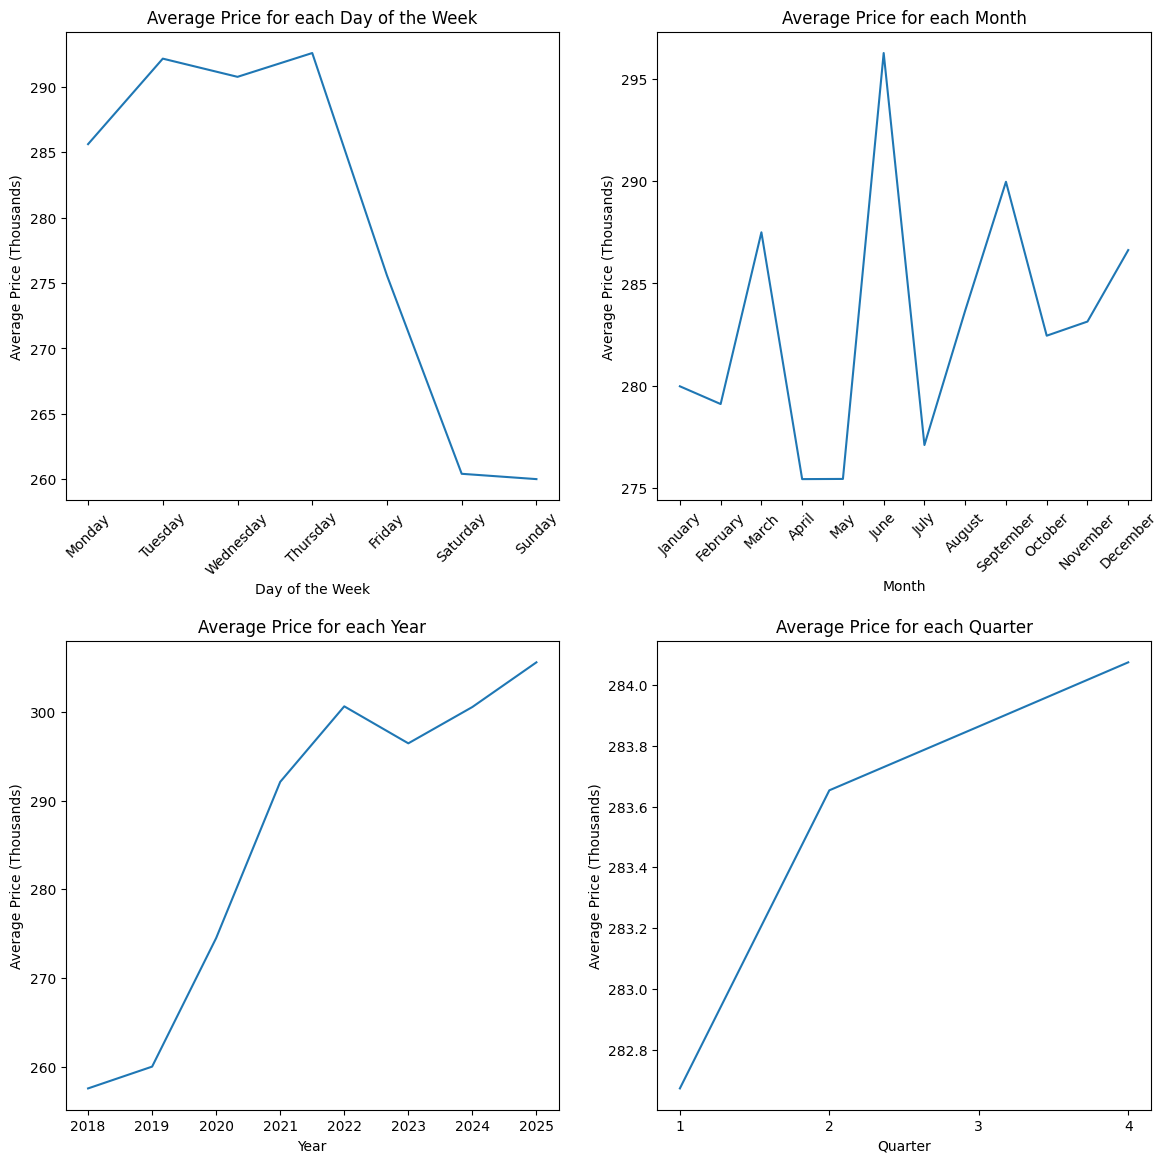

In [101]:
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

from matplotlib.ticker import MaxNLocator

ax3.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax0.set_title('Average Price for each Day of the Week')
ax1.set_title('Average Price for each Month')
ax2.set_title('Average Price for each Year')
ax3.set_title('Average Price for each Quarter')

ax0.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='x', rotation=45)


sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=avg_day_of_the_week_price, ax=ax0)
sns.lineplot(x='Month', y='Average Price (Thousands)', data=avg_month_price, ax=ax1)
sns.lineplot(x='Year', y='Average Price (Thousands)', data=avg_year_price, ax=ax2)
sns.lineplot(x='Quarter', y='Average Price (Thousands)', data=avg_quarter_price, ax=ax3)

plt.subplots_adjust(hspace=0.3)

In [118]:
type_count = no_outliers_df[['Flat','Semi-detached','Terraced', 'Detached', 'Other Property Type']].sum().reset_index()
type_count.columns = ['Property Type','Count']
new_old_count = no_outliers_df[['New Build','Old Build']].sum().reset_index()
new_old_count.columns = ['New or Old Build','Count']
tenure_count = no_outliers_df[['Freehold Tenure','Leasehold Tenure']].sum().reset_index()
tenure_count.columns = ['Tenure Type','Count']


,New or Old Build,Count
0,New Build,772439
1,Old Build,6063038


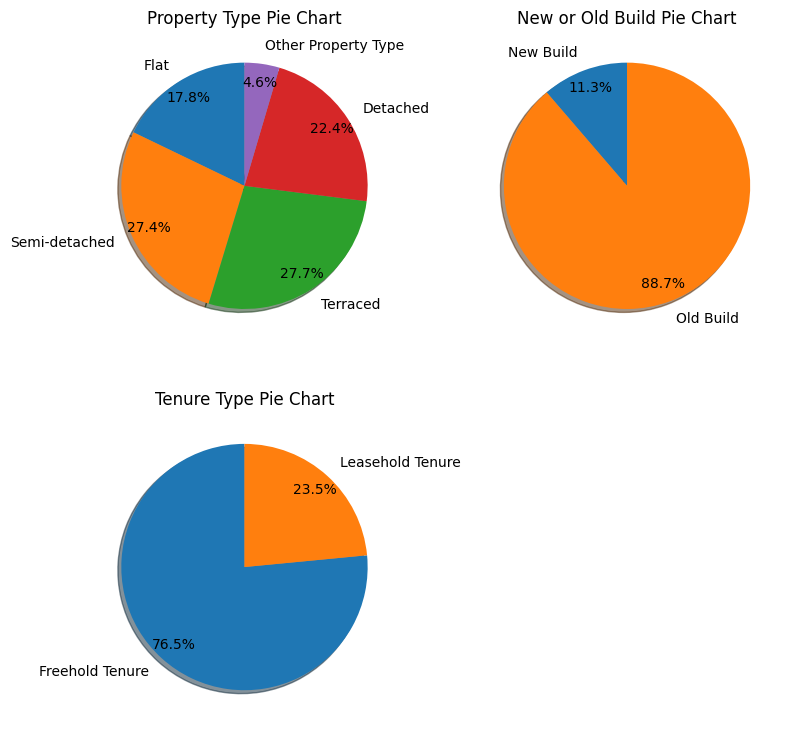

In [137]:
fig = plt.figure(figsize=(20, 20))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)

ax0.set_title('Property Type Pie Chart')
ax1.set_title('New or Old Build Pie Chart')
ax2.set_title('Tenure Type Pie Chart')

tc_label = ['Flat','Semi-detached','Terraced', 'Detached', 'Other Property Type']
NO_label = ['New Build','Old Build']
TT_label = ['Freehold Tenure','Leasehold Tenure']

type_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=tc_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax0
)
ax0.set_ylabel('')
plt.tight_layout()

new_old_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=NO_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax1
)
ax1.set_ylabel('')
plt.tight_layout()

tenure_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=TT_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax2
)
ax2.set_ylabel('')
plt.tight_layout()

<Axes: xlabel='Price (Thousands)', ylabel='Count'>

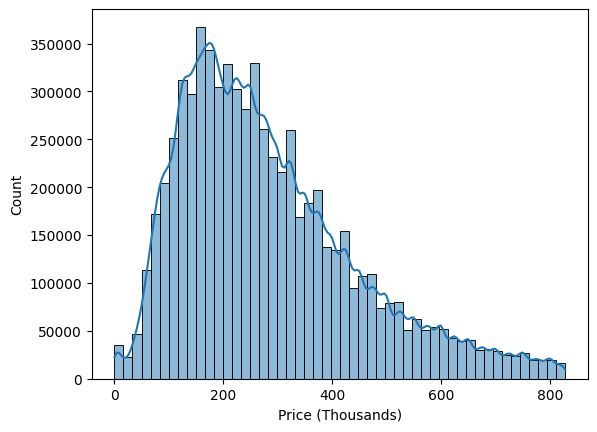

In [140]:
sns.histplot(no_outliers_df['Price (Thousands)'], kde=True, bins=50)


<Axes: xlabel='Year', ylabel='Price (Thousands)'>

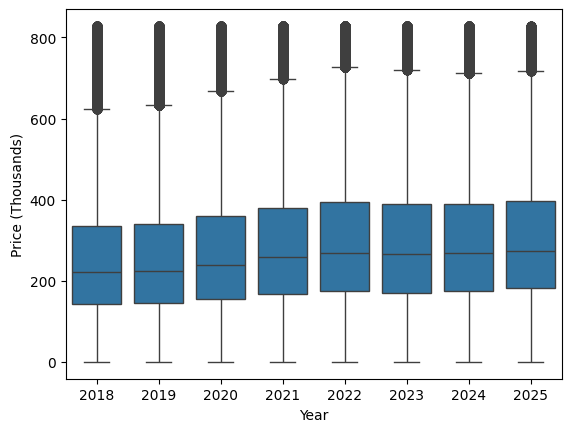

In [142]:
sns.boxplot(x='Year', y='Price (Thousands)', data=no_outliers_df)


In [163]:
oth_prop = no_outliers_df[no_outliers_df['Other Property Type'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
oth_prop.columns = ['Day of the Week', 'Average Price (Thousands)']
oth_prop

,Day of the Week,Average Price (Thousands)
0,0,248.439116
1,1,245.281618
2,2,251.331517
3,3,254.112952
4,4,259.156798
5,5,204.131872
6,6,195.629172


<Axes: title={'center': 'Average Price for each Day of the Week'}, xlabel='Day of the Week', ylabel='Average Price (Thousands)'>

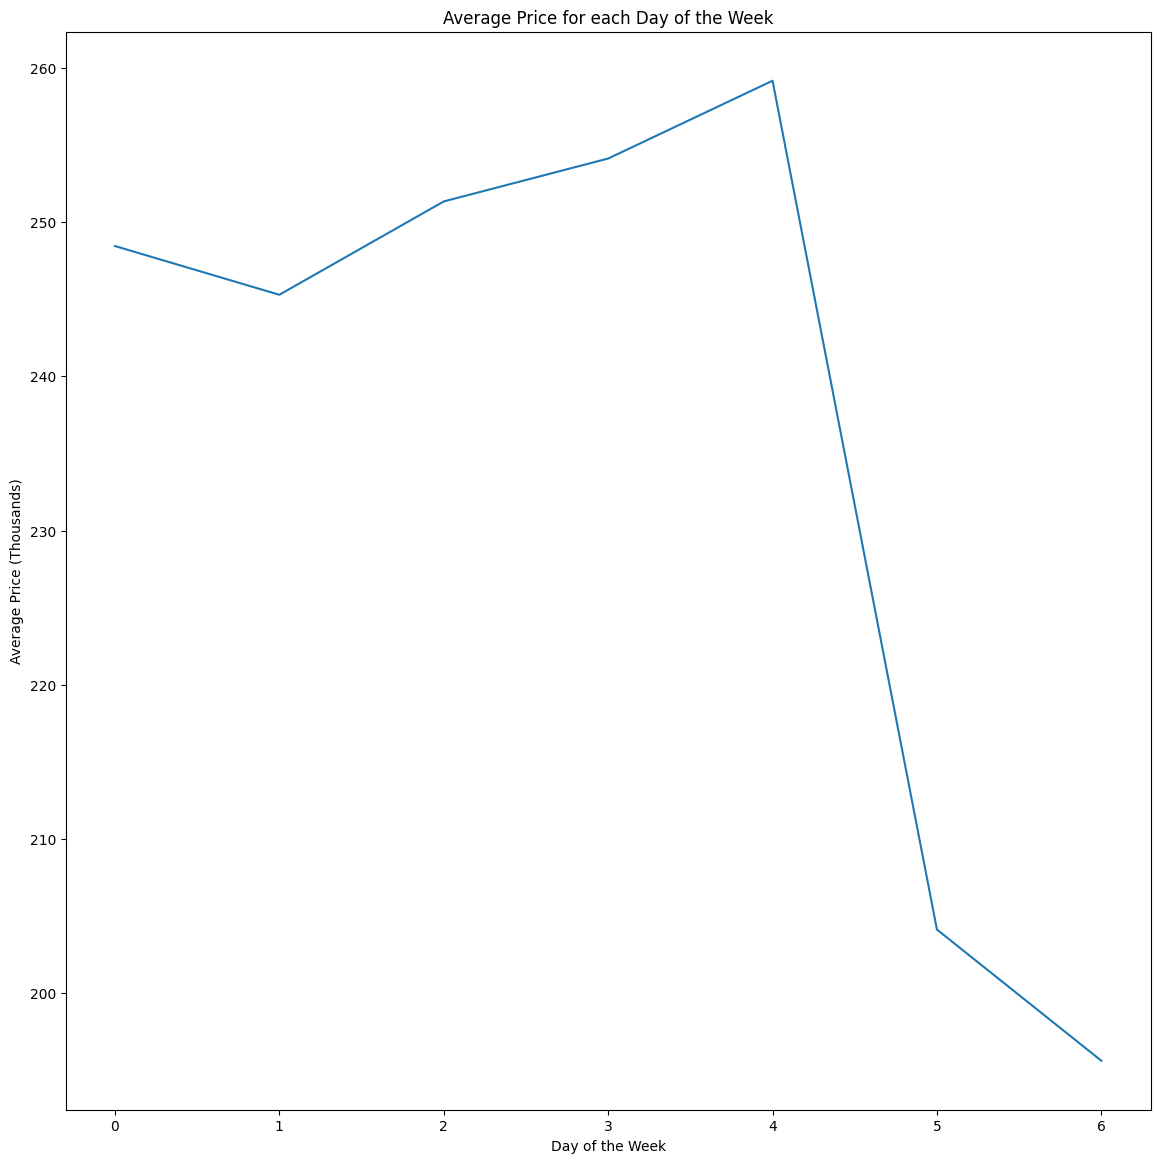

In [164]:
ax0 = plt.figure(figsize=(14, 14)).add_subplot(1,1, 1)
ax0.set_title('Average Price for each Day of the Week')
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=oth_prop, ax=ax0)